In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 6 # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_

Text(0,0.5,'magnitud')

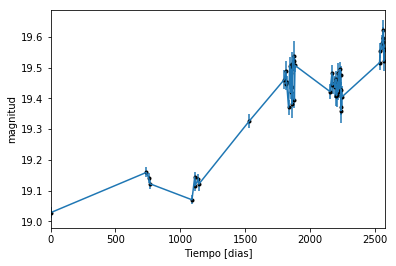

In [2]:
data = np.genfromtxt('LC_i_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=6, q=4)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

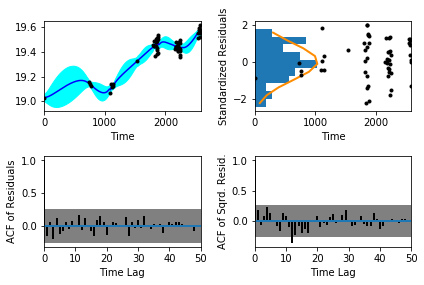

In [5]:
sample.assess_fit()

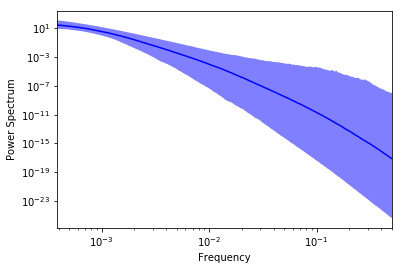

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.00048394,0.0487207,'Nivel de ruido')

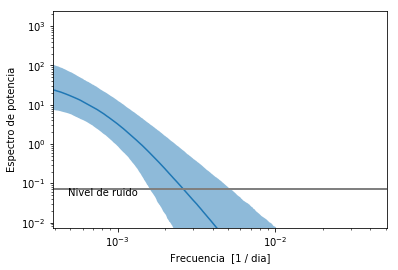

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 370.790218333
Median: 0.0223457360729
Standard deviation: 0.253339073582
68% credibility interval: [ 0.          0.42822213]
95% credibility interval: [ 0.         0.8633789]
99% credibility interval: [ 0.          0.97219568]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 370.790218333
Median: 0.0223457360729
Standard deviation: 0.253339073582
68% credibility interval: [ 0.          0.42822213]
95% credibility interval: [ 0.         0.8633789]
99% credibility interval: [ 0.          0.97219568]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 392.931129108
Median: 0.0
Standard deviation: 0.0648747077346
68% credibil

Plotting parameter summary


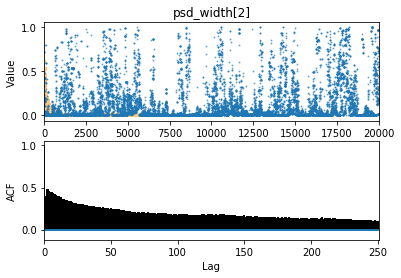

In [12]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [13]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1077.6037995
Median: 111.287989852
Standard deviation: 1.56672538363
68% credibility interval: [ 109.53092826  112.39820577]
95% credibility interval: [ 107.05683744  112.98929218]
99% credibility interval: [ 104.91526616  113.42376744]


In [15]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 7)

In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 777.985477917
Median: 1.70995565509
Standard deviation: 2.53249287186
68% credibility interval: [ 0.33980595  5.21484996]
95% credibility interval: [ 0.0490817   9.11609213]
99% credibility interval: [  0.02603506  11.42452971]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 431.814050799
Median: 2.02111183324
Standard deviation: 10.3832054692
68% credibility interval: [  0.1318213   14.34871167]
95% credibility interval: [  1.70180406e

In [17]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 563.492976459
Median: 6.78295642171e-28
Standard deviation: 2.11958400593
68% credibility interval: [  1.19073943e-95   1.56438112e-08]
95% credibility interval: [  3.87078202e-152   1.17629798e-001]
99% credibility interval: [  9.73288425e-156   5.16029877e+000]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 389.14732875
Median: 8.72169271874e-13
Standard deviation: 1581.35745542
68% credibility interval: [  9.42428345e-39   2.5327098

In [19]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1101.44992173
Median: 19.2909791641
Standard deviation: 0.144456771723
68% credibility interval: [ 19.17488464  19.41526542]
95% credibility interval: [ 19.00804402  19.57637399]
99% credibility interval: [ 18.84726229  19.80294186]


In [21]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 370.790218333
Median: 0.0223457360729
Standard deviation: 0.253339073582
68% credibility interval: [ 0.          0.42822213]
95% credibility interval: [ 0.         0.8633789]
99% credibility interval: [ 0.          0.97219568]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 370.790218333
Median: 0.0223457360729
Standard deviation: 0.253339073582
68% credibility interval: [ 0.          0.42822213]
95% credibility interval: [ 0.         0.8633789]
99% credibility interval: [ 0.          0.97219568]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 392.931129108
Median: 0.0
Standard deviation: 0.0648747077346
68% credibil

In [23]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1077.6037995
Median: 111.287989852
Standard deviation: 1.56672538363
68% credibility interval: [ 109.53092826  112.39820577]
95% credibility interval: [ 107.05683744  112.98929218]
99% credibility interval: [ 104.91526616  113.42376744]


In [25]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 6)

In [26]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 491.058498092
Median: 0.0125972054685
Standard deviation: 0.162048207821
68% credibility interval: [ 0.00106405  0.15213104]
95% credibility interval: [  4.39812612e-04   6.20972424e-01]
99% credibility interval: [  3.99514297e-04   9.19509188e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 352.826153892
Median: 0.00236903263612
Standard deviation: 0.0792507841432
68% credibility interval: [ 0.00054219  0.03802012]
95% credibility interval: [ 0.00040676  0.27489173]
99% credibility interval: [  3.92300963e-04   4.80623842e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 399.071853335
Median: 0.0200910274195
Standard 

In [27]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1940.98671063
Median: 0.0467280745317
Standard deviation: 0.065966521429
68% credibility interval: [ 0.02617563  0.09479542]
95% credibility interval: [ 0.01598942  0.2281044 ]
99% credibility interval: [ 0.01246203  0.42950808]


In [29]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1463.15009814
Median: 1.42480787908
Standard deviation: 0.204229855104
68% credibility interval: [ 1.23816943  1.65284539]
95% credibility interval: [ 1.08314985  1.88360217]
99% credibility interval: [ 0.97687854  1.97303772]


In [31]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1084.84209464
Median: 8.15388616968e-07
Standard deviation: 0.0156606809007
68% credibility interval: [  5.82078134e-09   7.92076216e-05]
95% credibility interval: [  1.28131451e-10   5.88571075e-03]
99% credibility interval: [  1.71812598e-11   2.56026237e-02]


In [33]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 6)

In [34]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 491.058498092
Median: (-0.079150576311+0j)
Standard deviation: 1.88956085957
68% credibility interval: [-0.95586749-0.22281005j -0.00668560-1.00067946j]
95% credibility interval: [ -3.90168481e+00+0.j        -2.76342414e-03-0.002921j]
99% credibility interval: [ -5.77744662e+00+0.j         -2.51022236e-03-0.0007202j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 352.826153892
Median: (-0.0148850710515+0.0508521580447j)
Standard deviation: 1.66784396989
68% credibility interval: [-0.23888744+3.74461827j -0.00340667+0.j        ]
95% credibility interval: [-1.72719567+3.0535253j  -0.00255572+0.88628204j]
99% credibility interval: [ -3.01984866e+00+1.64741175j  -2.46489965e-03+0.j        ]
Posterior summary for parameter

Plotting 2d PDF w KDE


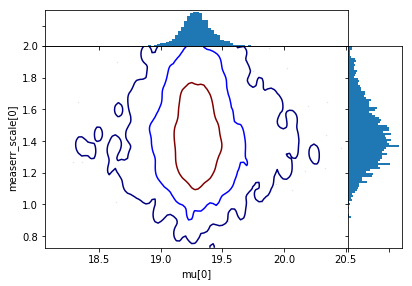

In [35]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


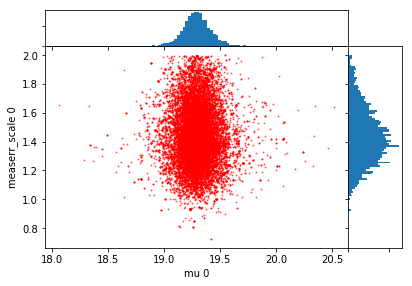

In [36]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


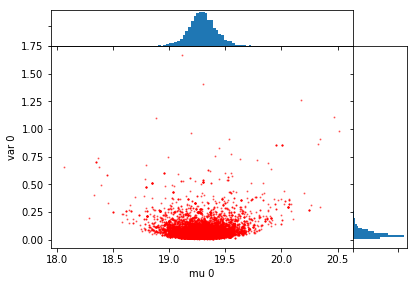

In [37]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


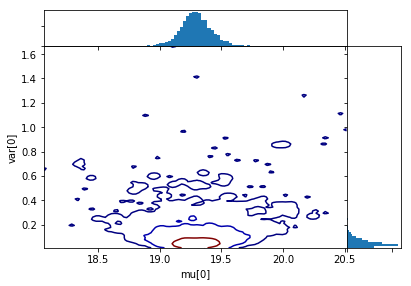

In [38]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

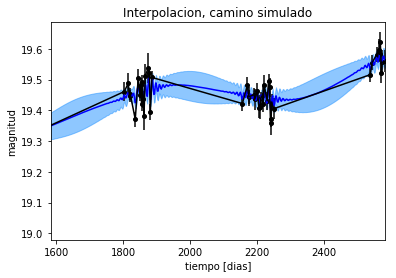

In [39]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

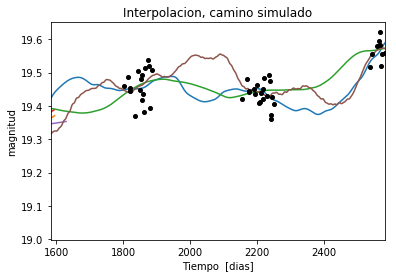

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')